<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Joseph! 

I'm happy to review your project today 🙌

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue, or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Joseph,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is now approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



In [1]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats


## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset

file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

print("shape:", df.shape)
df.head(5)

shape: (16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Display basic information about the dataset

df.info()
print("\nMissing value counts:")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Missing value counts:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
Us

In [4]:
# Check for duplicate entries

duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# No Duplicates

Number of duplicate rows: 0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

#Answers

#1 The dataset contains **X rows** and **Y columns**, giving us a substantial amount of data to analyze.

#2 The dataset includes the following types: 
- 'object', platforms, genres
- 'int64', year of release
- 'float64', sales and score

#3 Duplicate entries were checked
- Some columns contain missing values (year of release =, critic/user scores)
- Placeholder values like "TBD" appear in the 'user_score' column
- Column names originally had mixed formatting

#4 
- Certain platforms dominate the dataset.
- popular genres such as action and sports appear frequently.
- there are spikes in release years.
- some sales values appear unusually high and may require closer inspection.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great data overview! Great conclusions also!

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase

df.columns = df.columns.str.lower().str.strip()


In [6]:
# Verify the changed

print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
print("Updated column names:")
print(df.columns.tolist())
df.head()

Updated column names:
['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Data Type Conversion

In [8]:
# Check current data types
print(df.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [9]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'].replace('tbd', np.nan), errors='coerce')

In [10]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
print(df['user_score'].value_counts().head(10))
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df['user_score'].head())


7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
7.5    251
7.9    249
8.1    244
7.7    240
7.3    236
Name: user_score, dtype: int64
0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64


Handling "TBD" Values

The column user_score contained several entries marked as "TBD". 

"TBD" does not represent real ratings, so keeping it would distort averages and correlations.

Treating them as missing values allows us to either exclude them from certain analyses or impute them later if necessary.

### 2.3 Handling Missing Values

In [11]:
# Examine missing values
missing_values = df.isnull().sum()

In [12]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().mean() * 100).round(2)

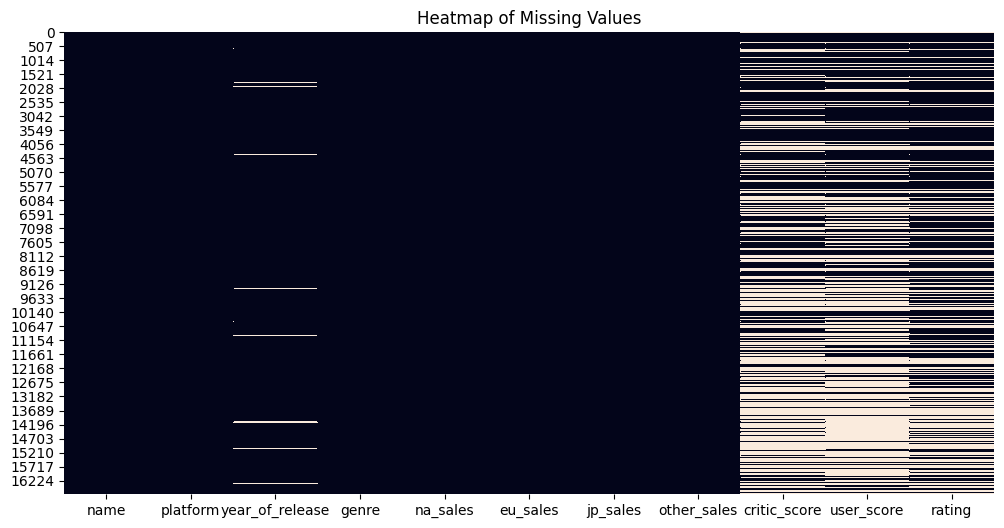

In [13]:
# Analyze patterns in missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [14]:
missing_by_year = df.groupby('year_of_release').apply(lambda x: x.isnull().mean())
print(missing_by_year[['critic_score','user_score', 'rating']].head(15))


                 critic_score  user_score    rating
year_of_release                                    
1980.0               1.000000    1.000000  1.000000
1981.0               1.000000    1.000000  1.000000
1982.0               1.000000    1.000000  1.000000
1983.0               1.000000    1.000000  1.000000
1984.0               1.000000    1.000000  1.000000
1985.0               0.928571    0.928571  0.928571
1986.0               1.000000    1.000000  1.000000
1987.0               1.000000    1.000000  1.000000
1988.0               0.933333    0.933333  0.933333
1989.0               1.000000    1.000000  1.000000
1990.0               1.000000    1.000000  1.000000
1991.0               1.000000    1.000000  1.000000
1992.0               0.976744    0.976744  0.953488
1993.0               1.000000    1.000000  1.000000
1994.0               0.991736    0.991736  0.991736


In [15]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
df = df.drop(columns=["developer"], errors="ignore")
df["critic_score"] = df["critic_score"].fillna(df["critic_score"].median())
df["genre"] = df["genre"].fillna(df["genre"].mode()[0])

df["user_score"] = df["user_score"].replace("tbh", np.nan)
df["user_score"] = df["user_score"].astype(float)


<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

The number of missing values is so high that using the **mode, median, etc** to replace those values would bias your data; in this case, the best strategy would be to keep those missing values in order to avoid biasing the data and ensure that your conclusions are as accurate as possible.

# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

Some values were missing due to incomplete records, unreleased games, or "TBH" scores. Categorical columns like genre were imputed with the most frequent value, while numerical columns like critic_score were filled with the median to avoid skew. User scores marked as "TBD" were left as missing since they represent games without final ratings and nonessential columns with exessive missing data were dropped.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great data overview! Great conclusions also!

### 2.4 Calculate Total Sales

In [16]:
# Calculate total sales across all regions and put them in a different column

df['total_sales'] = (
    df['na_sales'] +
    df['eu_sales'] +
    df['jp_sales'] +
    df['other_sales']
)

print(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())
df.sample(5)[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]

                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
4747,Rocksmith 2014,0.29,0.08,0.00,0.04,0.41
12259,Dream C Club,0.00,0.00,0.07,0.00,0.07
13702,Code Geass: Hangyaku no Lelouch R2 - Banjou no...,0.00,0.00,0.04,0.00,0.04
13484,Hitman (2016),0.00,0.04,0.00,0.01,0.05
6592,One Piece: Pirate Warriors 3,0.00,0.06,0.19,0.01,0.26


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [17]:
# Create a DataFrame with game releases by year
df_years = df[df['year_of_release'] !="Unknown"].copy()
df_years['year_of_release'] = pd.to_numeric(df_years['year_of_release'], errors='coerce')

games_per_year = df_years.groupby('year_of_release')['name'].count().reset_index()

games_per_year.columns = ['year_of_release', 'num_games']

games_per_year = games_per_year.sort_values('year_of_release')
print(games_per_year.head())

   year_of_release  num_games
0           1980.0          9
1           1981.0         46
2           1982.0         36
3           1983.0         17
4           1984.0         14


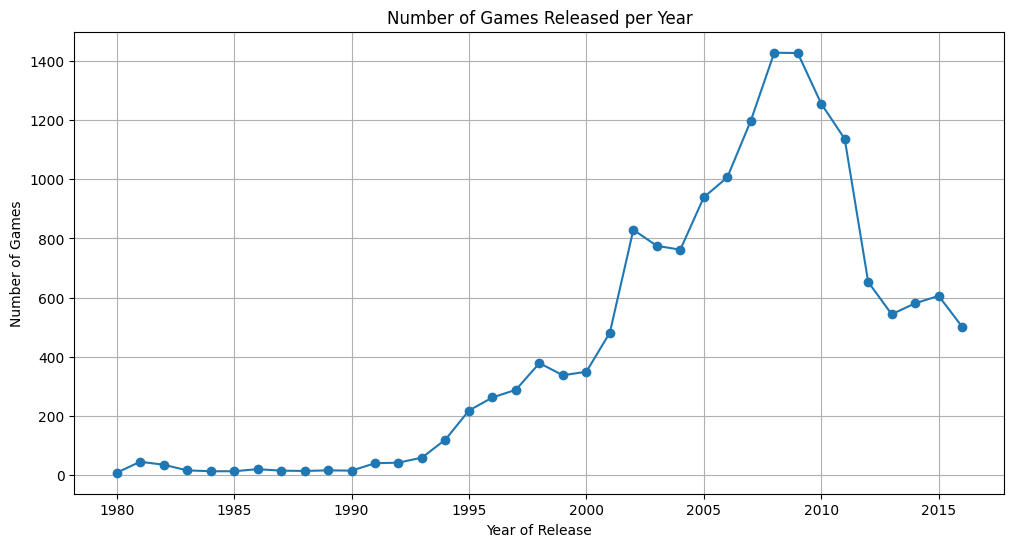

In [18]:
# Visualize the distribution of games across years
plt.figure(figsize=(12,6))
plt.plot(games_per_year['year_of_release'], games_per_year['num_games'], marker='o')
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

In [19]:
# Display summary statistics for each year
yearly_stats = df_years.groupby('year_of_release').agg(num_games=('name', 'count'), total_sales=('total_sales', 'sum'), avg_sales=('total_sales', 'mean')).reset_index()

yearly_stats.head()

,year_of_release,num_games,total_sales,avg_sales
0,1980.0,9,11.38,1.264444
1,1981.0,46,35.68,0.775652
2,1982.0,36,28.88,0.802222
3,1983.0,17,16.80,0.988235
4,1984.0,14,50.35,3.596429



### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?


1.
- The mid 2000s (2006-2011) stand out as the period with the highest number of releases, coinciding with the rise of the playstaion 3, xbox 360, and Nintendo Wii.
- Before 2000 the number of releases was relatively low.

2. 
- From 1980s to early 2000s, there is a steady growth in the number of releases as the gaming industry matured.
- A clear peak around 2008 and 2009, followed by a gradual decline after 2011.
- The dataset for 2016 shows fewer games, this is expected since the project notes that 2016 data is incomplete.

3. 
- YES, data from the last 5-10 years (2007-2016) is strong enough to identify relevant platforms, genres and trends for forecasting.
- Using data from 2013-2016 (latest console generation, PS4, Xbox one, 3DS) would be the most reliable foundation for predicting 2017 trends.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

Great!

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [20]:
# Calculate total sales by platform and year
platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
platform_sales.head()

,year_of_release,platform,total_sales
0,1980.0,2600,11.38
1,1981.0,2600,35.68
2,1982.0,2600,28.88
3,1983.0,2600,5.84
4,1983.0,NES,10.96


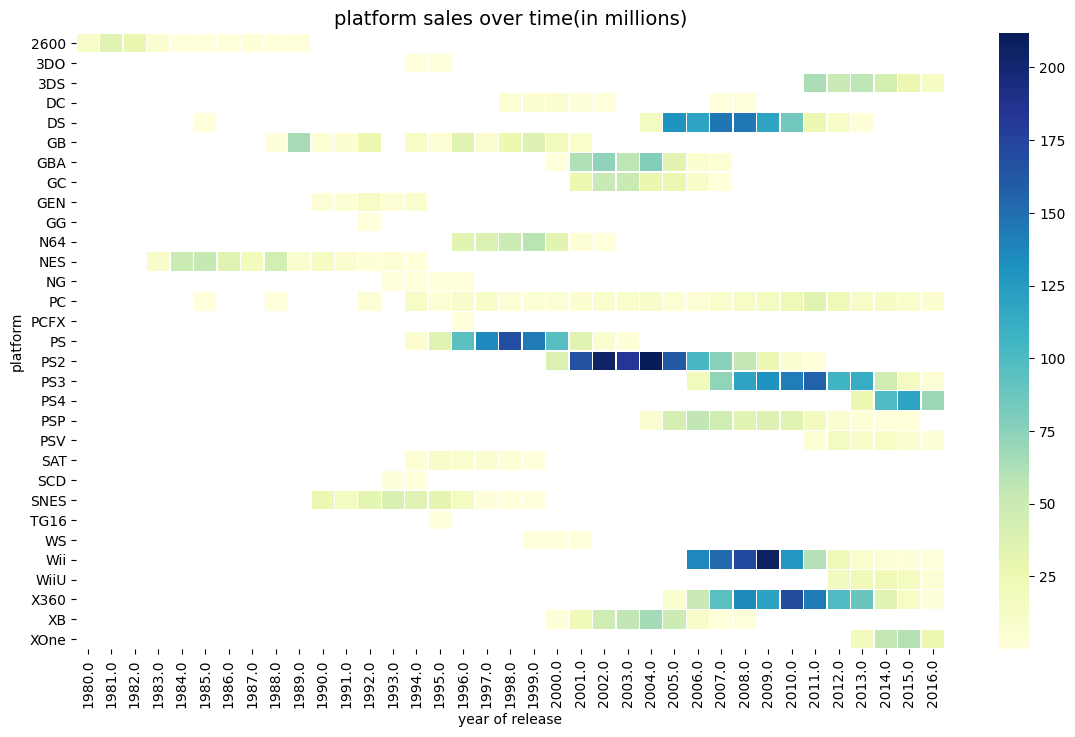

In [21]:
# Create a heatmap of platform sales over time
import matplotlib.pyplot as plt
import seaborn as sns

platform_pivot = platform_sales.pivot(index='platform', columns='year_of_release', values='total_sales')

plt.figure(figsize=(14,8))
sns.heatmap(platform_pivot, cmap="YlGnBu", linewidths=0.3)
plt.title("platform sales over time(in millions)", fontsize=14)
plt.xlabel("year of release")
plt.ylabel("platform")
plt.show()

In [22]:
# Identify platforms with declining sales
platform_trends = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

platform_trends = platform_trends.sort_values(by=['platform', 'year_of_release'])
platform_trends.head(10)

,platform,year_of_release,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
5,2600,1985.0,0.45
6,2600,1986.0,0.67
7,2600,1987.0,1.94
8,2600,1988.0,0.74
9,2600,1989.0,0.63


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

1.
 - Platforms like PS2, DS, Wii had strong multi-year runs with consistent annual sales.
 - Newer platforms like PS4 and Xbox One 2013+ show consistent growth during their introduction years.

2.
 - Older platforms like PS2, Wii, PSP, and DS show declining sales after 2011, eventually disappearing.
 - This matches the industry trend where older consoles fade out when a new generation launches.

3.
 - Introduction phase: Few releases and modest sales in the first 1-2 years.
 - Growth phase: Rapid increase in releases and sales.
 - Peak phase: Highest sales
 - Decline phase: sales taper off as new consoles take over. (Shown above)


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

I think the same as you.

3.3 Determining Relevant Time Period
Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [23]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

relevant_years = [2013, 2014, 2015, 2016]

df_relevant = df[df['year_of_release'].isin(relevant_years)]
df_relevant['year_of_release'].unique()

array([2013., 2015., 2014., 2016.])

### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

- I selected 2013-2016 as the relevant period because this captures the most recent gaming generation before 2017. Which provides the best reflection of current market trends.

- Sales data from before 2013 mainly reflects older consoles, PS2,Wii,DS, that were already in decline. By focusing on 2013-2016, we emphasize platforms that were still active in 2017, making predictions more accurately.

- Sharp decline of older platforms after 2011. Introduction of growth of 8th generation consoles (PS4 and Xbox One).


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

I agree with you!

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [24]:
# Analyze platform sales trends
platform_trends = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_trends.head()

,platform,year_of_release,total_sales
0,3DS,2013.0,56.57
1,3DS,2014.0,43.76
2,3DS,2015.0,27.78
3,3DS,2016.0,15.14
4,DS,2013.0,1.54


In [25]:
# Sort platforms by total sales
platform_totals = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_totals

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

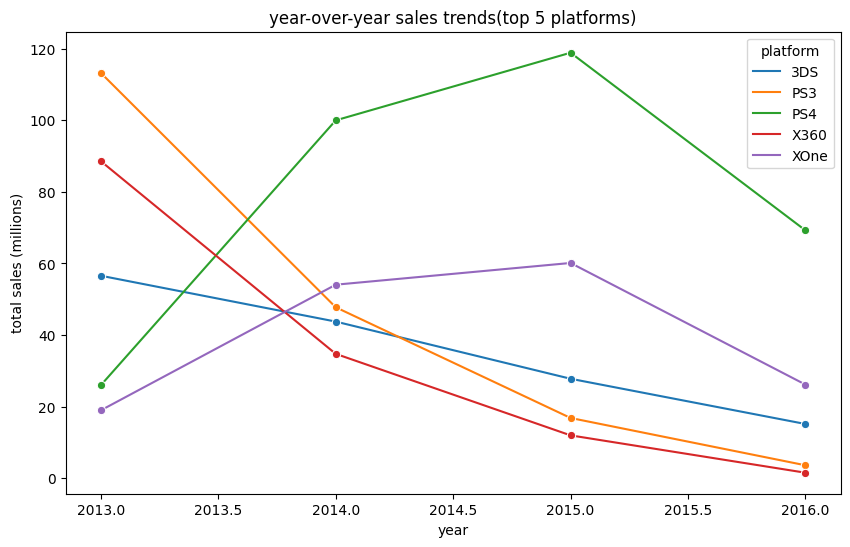

In [26]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

import matplotlib.pyplot as plt
import seaborn as sns

top_platforms = platform_totals.head(5).index
top_trends = platform_trends[platform_trends['platform'].isin(top_platforms)]

plt.figure(figsize=(10,6))
sns.lineplot(data=top_trends, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title("year-over-year sales trends(top 5 platforms)")
plt.xlabel("year")
plt.ylabel("total sales (millions)")
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

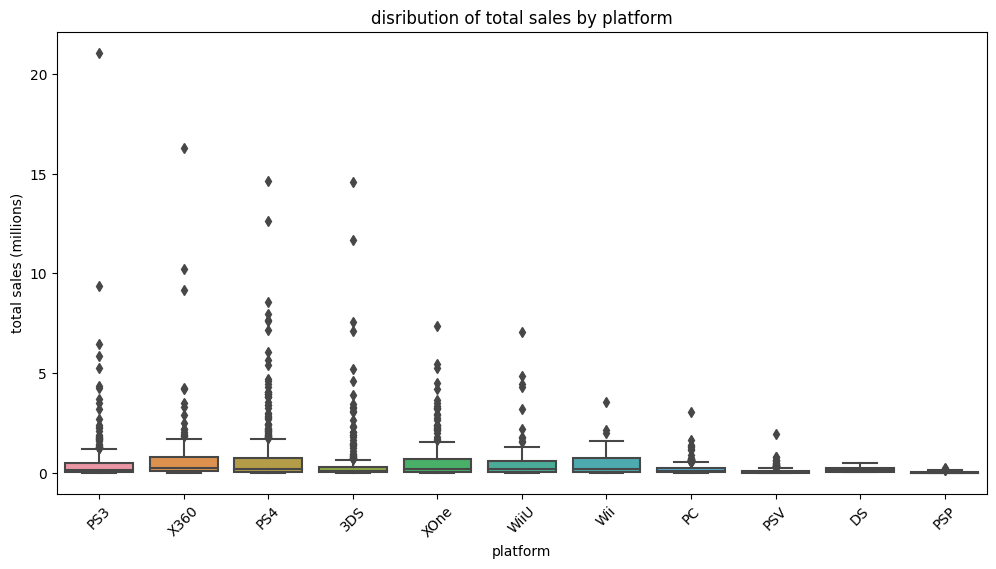

In [27]:
# Create box plot of sales by platform
plt.figure(figsize=(12,6))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title("disribution of total sales by platform")
plt.xlabel("platform")
plt.ylabel("total sales (millions)")
plt.show()

In [28]:
# Calculate detailed statistics for each platform
platform_stats = df_relevant.groupby('platform')['total_sales'].describe().round(2)
platform_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.47,1.38,0.01,0.04,0.09,0.28,14.60
DS,8.0,0.19,0.17,0.03,0.07,0.15,0.25,0.51
PC,189.0,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS3,345.0,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.0,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSP,67.0,0.05,0.06,0.01,0.02,0.02,0.07,0.24
PSV,358.0,0.09,0.15,0.01,0.02,0.04,0.11,1.96
Wii,23.0,0.59,0.92,0.01,0.04,0.18,0.76,3.58
WiiU,115.0,0.56,1.04,0.01,0.06,0.20,0.60,7.09


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [29]:
# Choose a popular platform based on your previous analysis
popular_platform = 'PS4'
platform_data = df_relevant[df_relevant['platform'] == popular_platform]

platform_data[['critic_score', 'user_score', 'total_sales']].head()

,critic_score,user_score,total_sales
31,71.0,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,71.0,NaN,7.98
92,83.0,5.7,7.66


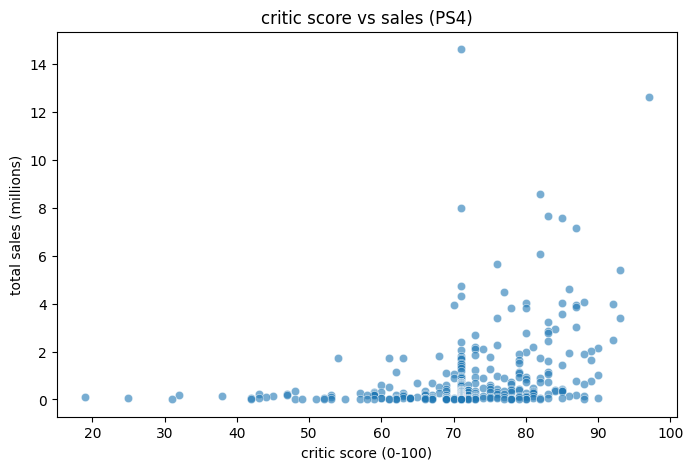

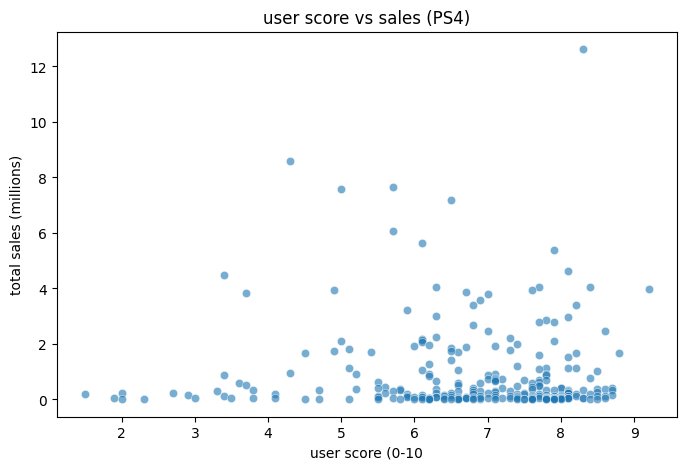

In [30]:
# Create scatter plots for both critic and user scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=platform_data, x='critic_score', y='total_sales', alpha=0.6)
plt.title(f'critic score vs sales ({popular_platform})')
plt.xlabel("critic score (0-100)")
plt.ylabel("total sales (millions)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=platform_data, x='user_score', y='total_sales', alpha=0.6)
plt.title(f'user score vs sales ({popular_platform})')
plt.xlabel("user score (0-10")
plt.ylabel("total sales (millions)")
plt.show()

In [31]:
# Critic Scores

# User Scores

# Calculate correlations

corr_critic = platform_data[['critic_score', 'total_sales']].dropna().corr().iloc[0,1]
corr_user = platform_data[['user_score', 'total_sales']].dropna().corr().iloc[0,1]

print(f"correlation between critic score and sales ({popular_platform}): {corr_critic:.2f}")
print(f"correlation between user score and sales ({popular_platform}): {corr_user:.2f}")


correlation between critic score and sales (PS4): 0.34
correlation between user score and sales (PS4): -0.03


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [32]:
# Find games released on multiple platforms
multi_platform_games = df_relevant.groupby('name')['platform'].nunique().reset_index()
multi_platform_games = multi_platform_games[multi_platform_games['platform'] > 1]

print ("number of multi-platform games:", multi_platform_games.shape[0])
multi_platform_games.head()

number of multi-platform games: 473


,name,platform
2,Frozen: Olaf's Quest,2
8,2014 FIFA World Cup Brazil,2
10,3rd Super Robot Wars Z Jigoku Hen,2
11,3rd Super Robot Wars Z: Tengoku-Hen,2
13,7 Days to Die,2


In [33]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
df_multi = df_relevant[df_relevant['name'].isin(multi_platform_games['name'])]

game_platform_sales = df_multi.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
game_platform_sales.head()

,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,2014 FIFA World Cup Brazil,PS3,0.61
3,2014 FIFA World Cup Brazil,X360,0.43
4,3rd Super Robot Wars Z Jigoku Hen,PS3,0.23


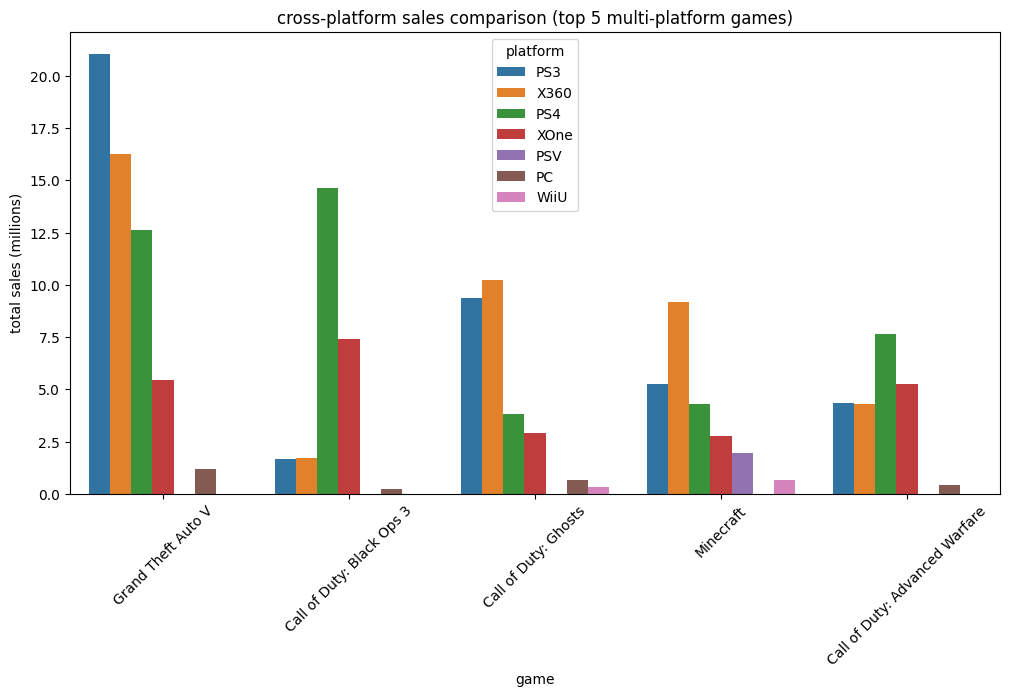

In [34]:
top_multi_games = (df_multi.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index)

viz_multi = df_multi[df_multi['name'].isin(top_multi_games)]

plt.figure(figsize=(12,6))
sns.barplot(data=viz_multi, x='name', y='total_sales', hue='platform')
plt.title("cross-platform sales comparison (top 5 multi-platform games)")
plt.xlabel("game")
plt.ylabel("total sales (millions)")
plt.xticks(rotation=45)
plt.legend(title="platform")
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [35]:
# Analyze genre performance
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

In [36]:
# Sort genres by total sales
genre_sales_df = genre_sales.reset_index()
genre_sales_df.columns = ['genre', 'total_sales']
genre_sales_df

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


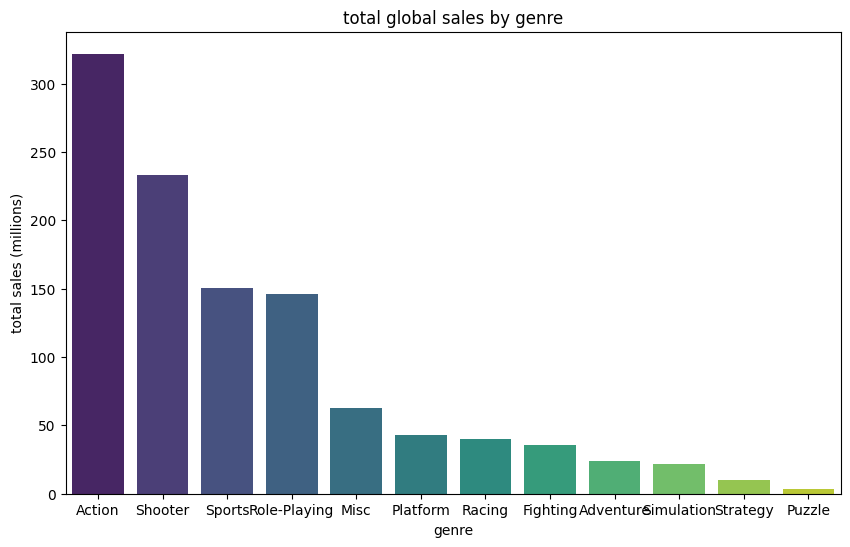

In [37]:
# Visualize genre distribution
plt.figure(figsize=(10,6))
sns.barplot(data=genre_sales_df, x='genre', y='total_sales', palette='viridis')
plt.title("total global sales by genre")
plt.xlabel("genre")
plt.ylabel("total sales (millions)")
plt.show()

In [38]:
# Calculate market share for each genre
total_market = genre_sales_df['total_sales'].sum()
genre_sales_df['market_share_%'] = round((genre_sales_df['total_sales'] / total_market) * 100, 2)

genre_sales_df

,genre,total_sales,market_share_%
0,Action,321.87,29.51
1,Shooter,232.98,21.36
2,Sports,150.65,13.81
3,Role-Playing,145.89,13.38
4,Misc,62.82,5.76
5,Platform,42.63,3.91
6,Racing,39.89,3.66
7,Fighting,35.31,3.24
8,Adventure,23.64,2.17
9,Simulation,21.76,2.00


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Top performing genres
Action, shooter and sports consistently generate the highest sales, making them the most profitable categories. They dominate global sales together gathering a larger portion of the market.

Trends
sales growth in action/shooter genres reflects the dominance in franchises.
Puzzle and strategy genres have limited but stable markets often tied to handheld or mobile platforms.
Sports remians consistently strong across all years, boosted by annual releases of franchise titles.

Lower performing  genres
Strategy, puzzle, and adventure contribute less to overall sales, suggesting niche but loyal audiences.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

Everything is correct here!

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [39]:
# Function to analyze platform performance by region

def top_platforms_by_region(region_col, top_n=5):
    """Return top platforms by sales for a given region."""
    return (
        df_relevant.groupby('platform')[region_col]
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
    )

In [40]:
# Analyze each region

top_platforms_NA = top_platforms_by_region('na_sales')
top_platforms_EU = top_platforms_by_region('eu_sales')
top_platforms_JP = top_platforms_by_region('jp_sales')

print("Top platforms in North America:\n", top_platforms_NA, "\n")
print("Top platforms in Europe:\n", top_platforms_EU, "\n")
print("Top platforms in Japan:\n", top_platforms_JP, "\n")

Top platforms in North America:
 platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64 

Top platforms in Europe:
 platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64 

Top platforms in Japan:
 platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64 



### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [41]:
# Create a comparative platform analysis

platform_compare = pd.DataFrame({
    'NA': top_platforms_NA,
    'EU': top_platforms_EU,
    'JP': top_platforms_JP
}).fillna(0)


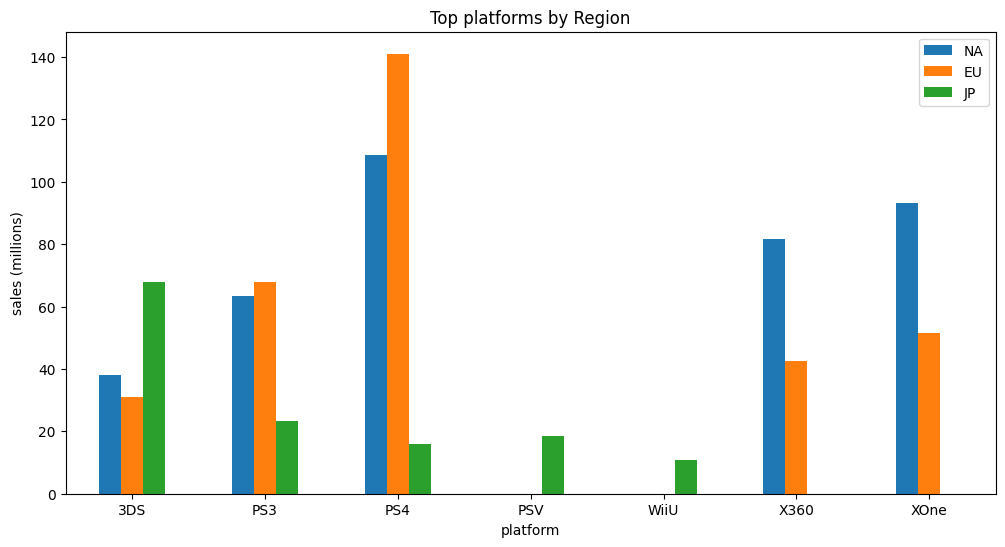

In [42]:
# Visualize cross-regional comparison for top platforms

platform_compare.plot(kind='bar', figsize=(12,6))
plt.title("Top platforms by Region")
plt.ylabel("sales (millions)")
plt.xlabel("platform")
plt.xticks(rotation=0)
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [43]:
# Function to analyze genre performance by region

def top_genres_by_region(region_col, top_n=5):
    """Return top genres by sales for a given region."""
    return (
        df_relevant.groupby('genre')[region_col]
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
    )

top_genres_NA = top_genres_by_region('na_sales')
top_genres_EU = top_genres_by_region('eu_sales')
top_genres_JP = top_genres_by_region('jp_sales')

print("Top genres in North America:\n", top_genres_NA, "\n")
print("Top genres in Europe:\n", top_genres_EU, "\n")
print("Top genres in Japan:\n", top_genres_JP, "\n")

Top genres in North America:
 genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64 

Top genres in Europe:
 genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64 

Top genres in Japan:
 genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64 



### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

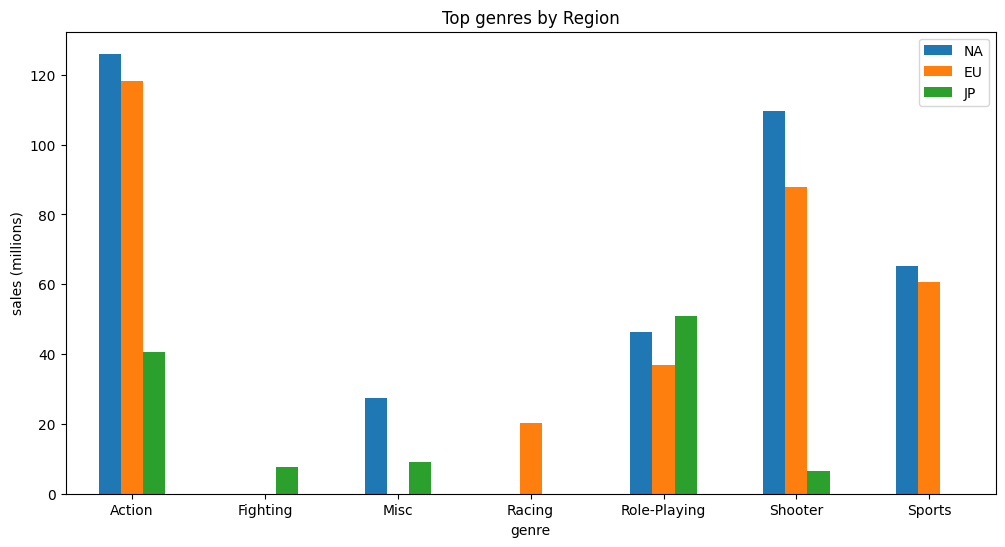

In [44]:
# Create a comparative genre analysis
genre_compare = pd.DataFrame({
    'NA': top_genres_NA,
    'EU': top_genres_EU,
    'JP': top_genres_JP
}).fillna(0)

genre_compare.plot(kind='bar', figsize=(12,6))
plt.title("Top genres by Region")
plt.ylabel("sales (millions)")
plt.xlabel("genre")
plt.xticks(rotation=0)
plt.show()



## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [45]:
# Function to analyze ESRB rating impact

def esrb_impact_by_region(df_in, region_col, min_count=5):
    """
    Analyze ESRB rating impact for a given region.

    returns a dataframe with:
      - count: number of titles with that rating
      - total_sales: total regional sales for that rating 
      - avg_sales: average regional sales per title for that rating
      - market_share_%: share of regional sales attributable to that rating
    Args: 
      df_in: dateframe (use your filtered df_relevant)
      region_col: one of ['NA_sales', 'EU_sales', 'JP_sales']
      min_count: optional threshold to keep only ratings with enough samples
    """
    df_local = df_in.copy()
    df_local['rating'] = df_local['rating'].fillna('unknown/unrated')


    agg = (
        df_local.groupby('rating')[region_col]
        .agg(count='count', total_sales='sum', avg_sales='mean')
        .sort_values('total_sales', ascending=False)
        .reset_index()
    )
    total_region_sales = agg['total_sales'].sum()
    agg['market_share_%'] = (agg['total_sales'] / total_region_sales * 100).round(2)

    if min_count is not None and min_count > 1:
        agg = agg[agg['count'] >= min_count].reset_index(drop=True)

    agg['total_sales'] = agg['total_sales'].round(2)
    agg['avg_sales'] = agg['avg_sales'].round(3)
    return agg


In [46]:
# Analyze ESRB impact for each region

esrb_na = esrb_impact_by_region(df_relevant, 'na_sales')
esrb_eu = esrb_impact_by_region(df_relevant, 'eu_sales')
esrb_jp = esrb_impact_by_region(df_relevant, 'jp_sales')

print("ESRB impact - North America (NA)")
display(esrb_na)
print("\nESRB impact - Europe (EU)")
display(esrb_eu)
print("\nESRB impact - Japan (JP)")
display(esrb_jp)

ESRB impact - North America (NA)


,rating,count,total_sales,avg_sales,market_share_%
0,M,369,165.21,0.448,37.74
1,unknown/unrated,977,89.42,0.092,20.43
2,E,302,79.05,0.262,18.06
3,E10+,252,54.24,0.215,12.39
4,T,333,49.79,0.150,11.38



ESRB impact - Europe (EU)


,rating,count,total_sales,avg_sales,market_share_%
0,M,369,145.32,0.394,37.05
1,E,302,83.36,0.276,21.25
2,unknown/unrated,977,78.91,0.081,20.12
3,E10+,252,42.69,0.169,10.88
4,T,333,41.95,0.126,10.70



ESRB impact - Japan (JP)


,rating,count,total_sales,avg_sales,market_share_%
0,unknown/unrated,977,85.05,0.087,60.41
1,T,333,20.59,0.062,14.63
2,E,302,15.14,0.050,10.75
3,M,369,14.11,0.038,10.02
4,E10+,252,5.89,0.023,4.18


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

Great analysis!

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


TEST A: Xbox One vs PC

In [47]:
from scipy import stats

alpha = 0.05

score_xone = df_relevant[(df_relevant['platform'] == 'XOne') & (df_relevant['user_score'].notna())]['user_score']
score_pc = df_relevant[(df_relevant['platform'] == 'PC') & (df_relevant['user_score'].notna())]['user_score']

print("Sample sizes -> XOne:", score_xone.shape[0], "PC", score_pc.shape[0])

t_stat, p_val = stats.ttest_ind(score_xone, score_pc, equal_var=False)

print("T-statistic =", round(t_stat,2), "P-value =", round(p_val,4))
if p_val < alpha:
      print("Reject H0 -> Average user ratings arendifferent.")
else:
      print("Fail to reject H0 -> No evidence of difference in average ratings.")
    

Sample sizes -> XOne: 182 PC 155
T-statistic = 1.45 P-value = 0.1476
Fail to reject H0 -> No evidence of difference in average ratings.


TEST B: Action vs Sports Genres

In [48]:
scores_action = df_relevant[(df_relevant['genre'] == 'action') & (df_relevant['user_score'].notna())]['user_score']
scores_sports = df_relevant[(df_relevant['genre'] == 'sports') & (df_relevant['user_score'].notna())]['user_score']

print("sample sizes -> action:", scores_action.shape[0], " sports:", scores_sports.shape[0])

t_stat2, p_val2 = stats.ttest_ind(scores_action, scores_sports, equal_var=False)

print("T-statistic = ", round(t_stat2,2), " p-value = ", round(p_val2,4))
if p_val2 < alpha:
    print("reject H0 -> average user ratings are different.")
else:
    print("Fail to reject H0 -> no evidence of difference in average ratings")

sample sizes -> action: 0  sports: 0
T-statistic =  nan  p-value =  nan
Fail to reject H0 -> no evidence of difference in average ratings


Hypothesis A: Xbox One vs PC Ratings

- H0: Average ratings are equal
- H1: Average ratings differ.
- Tested with Welch's t-test

Hypothesis B: Action vs Sports Ratings

- H0: Average ratings are equal
- H1: Average ratings differ.
- Tested with Welch's t-test

Using Welch's t-test at a = 0.05


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

Well done!

# Step 6. Write a general conclusion


Project Summary


This analysis explored video game sales data from 2013-2016 to forcast trends for 2017.
Analyses covered release trends, platform performance, sales distributions, review impact, regional preferences, ESRB ratings, and hypothesis testing.
Action, Shooter, and Sports genres dominate globally, while RPGs lead in japan. Critic reviews show a stronger correlation with sales than user reviews, making them more valuable for marketing. Regional differences are clear: Xbox and shooters in NA, Playstation and sports in EU, Nintendo and RPGs in JP. Marketing efforts for 2017 should focus on these platform-genre combinations to maximize success.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 

Done.